# A Study on University Students’ Success and Dropout Rates (Code)

#### Dillan Sant (dks43), Thomas Barker (jtb80), Talia Granick (tjg41), Nolan Zhong (nxz), Isabelle Xiong (yx215)

Importing Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
if ('0.11' in sns.__version__) or ('0.12' in sns.__version__):
    sns.set_theme()
else:
    sns.set()

In [2]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ != '1.2.1' and sklearn.__version__ != '1.2.2'): #update for latest otter version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.2.1


Loading In Datasets

## Student Dropout/Demographics Exploratory Data Analysis

In [3]:
collegeCompletion = pd.read_csv("cc_state_sector_grads.csv")
collegeCompletion.head()

,index,stateid,state,state_abbr,control,level,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,grad_cohort_ct
0,0,1,Alabama,AL,Private for-profit,4-year,2011,B,A,4y bach,0,0.0,0,NaN,NaN,9
1,1,1,Alabama,AL,Private for-profit,4-year,2011,B,Ai,4y bach,1,0.0,0,0.0,0.0,9
2,2,1,Alabama,AL,Private for-profit,4-year,2011,B,B,4y bach,51,2.0,3,3.9,5.9,9
3,3,1,Alabama,AL,Private for-profit,4-year,2011,B,H,4y bach,1,0.0,0,0.0,0.0,9
4,4,1,Alabama,AL,Private for-profit,4-year,2011,B,W,4y bach,66,15.0,18,22.7,27.3,9


In [4]:
dropout = pd.read_csv("student_dropout_academic_success.csv")
dropout['Gender'] = dropout['Gender'].replace(1, 'Male')
dropout['Gender'] = dropout['Gender'].replace(0, 'Female')
dropout['Scholarship holder'] = dropout['Scholarship holder'].replace(1, 'Scholarship')
dropout['Scholarship holder'] = dropout['Scholarship holder'].replace(0, 'No Scholarship')
dropout['Debtor'] = dropout['Debtor'].replace(1, 'Debtor')
dropout['Debtor'] = dropout['Debtor'].replace(0, 'Not Debtor')
dropout['Tuition fees up to date'] = dropout['Tuition fees up to date'].replace(1, 'Up to date')
dropout['Tuition fees up to date'] = dropout['Tuition fees up to date'].replace(0, 'Not up to date')

dropout['Dropout?'] = np.where(dropout['Target'] == 'Dropout', 1, 0)
print(dropout['Tuition fees up to date'].head())

0        Up to date
1    Not up to date
2    Not up to date
3        Up to date
4        Up to date
Name: Tuition fees up to date, dtype: object


Text(0, 0.5, 'Count')

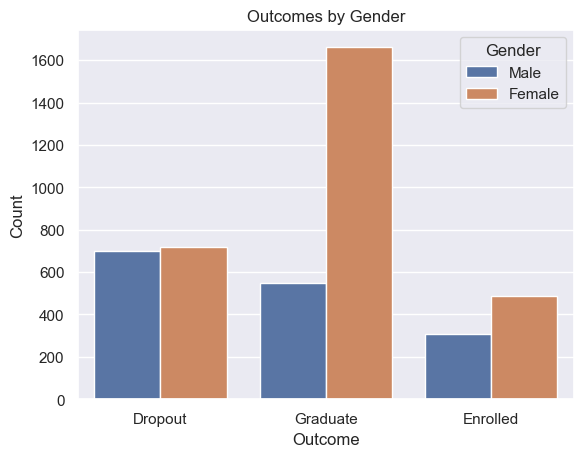

In [5]:
sns.countplot(dropout, x='Target', hue='Gender')
plt.title('Outcomes by Gender')
plt.xlabel('Outcome')
plt.ylabel('Count')

Text(0, 0.5, 'Proportion')

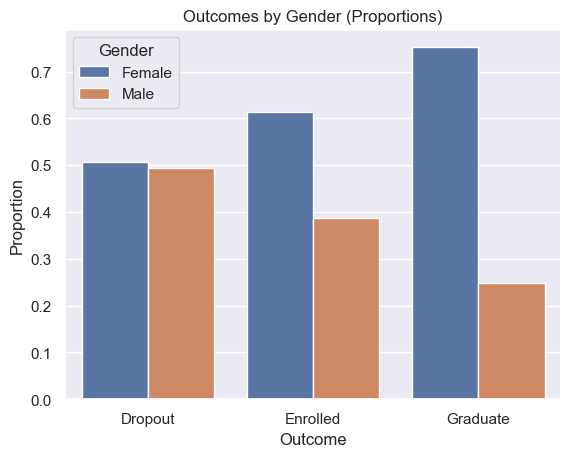

In [6]:
prop_dropout = dropout.groupby(['Gender', 'Target']).size().reset_index(name='count')
prop_dropout['proptarget'] = prop_dropout.groupby('Target')['count'].transform(lambda x: x / x.sum())
prop_dropout['propgender'] = prop_dropout.groupby('Gender')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=prop_dropout, x='Target', y='proptarget', hue='Gender')
plt.title('Outcomes by Gender (Proportions)')
plt.xlabel('Outcome')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

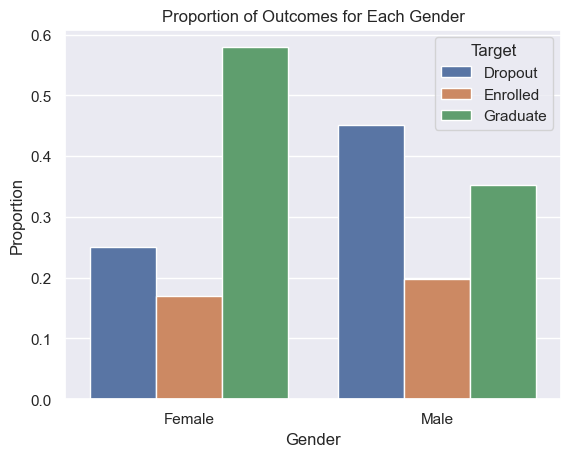

In [7]:
sns.barplot(data=prop_dropout, x='Gender', y='propgender', hue='Target')
plt.title('Proportion of Outcomes for Each Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')

Text(0.5, 1.0, 'Outcomes by Age (<= 30 years old)')

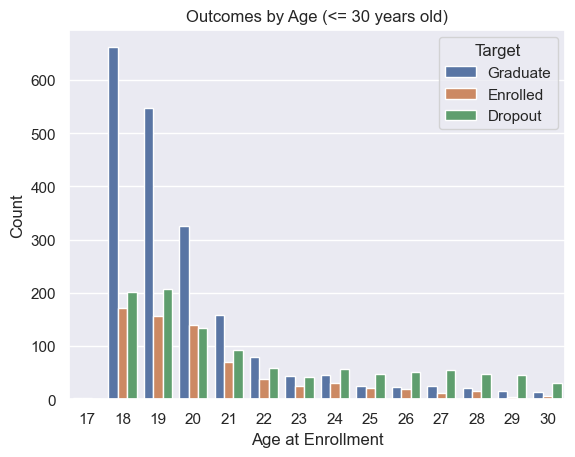

In [8]:
younger = dropout[dropout['Age at enrollment'] <= 30]
sns.countplot(younger, x='Age at enrollment', hue='Target', hue_order=['Graduate', 'Enrolled', 'Dropout'])
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.title('Outcomes by Age (<= 30 years old)')

Text(0.5, 0, 'Scholarship Holder?')

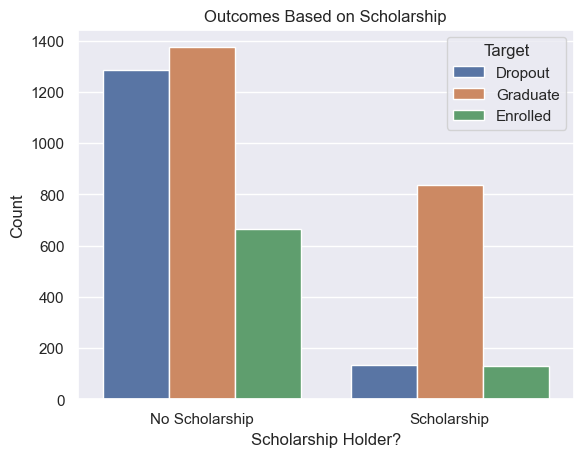

In [9]:
sns.countplot(dropout, x='Scholarship holder', hue='Target')
plt.title('Outcomes Based on Scholarship')
plt.ylabel('Count')
plt.xlabel('Scholarship Holder?')

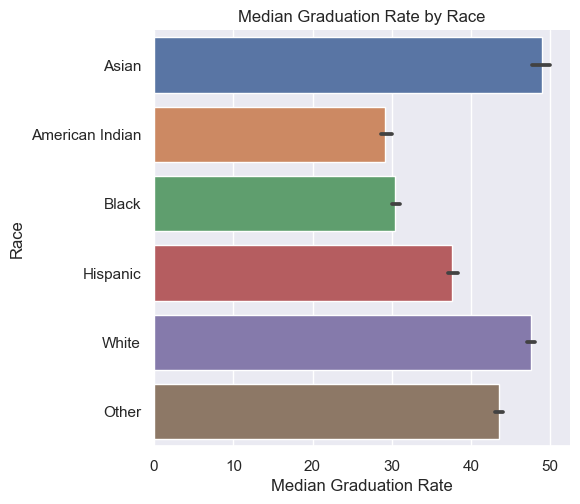

In [10]:
sns.catplot(y = "race", x = "grad_150_rate", data = collegeCompletion, kind = "bar", estimator='median').set_yticklabels(['Asian', 'American Indian', 'Black', "Hispanic", "White", "Other"])
plt.ylabel("Race")
plt.xlabel("Median Graduation Rate")
plt.title("Median Graduation Rate by Race")
plt.show()

In [11]:
dropoutAges = dropout.groupby("Target")["Age at enrollment"].mean()
dropoutAges

Target
Dropout     26.068966
Enrolled    22.369018
Graduate    21.783612
Name: Age at enrollment, dtype: float64

## Student Dropout/Demographics Results and Methods

In [12]:
print(dropout["Dropout?"].value_counts())
print(3003/(3003+1421))

Dropout?
0    3003
1    1421
Name: count, dtype: int64
0.6787974683544303


In [13]:
from sklearn.model_selection import train_test_split

dropout_data = dropout[['Gender', 'Age at enrollment', 'Scholarship holder', 'Debtor', 'Tuition fees up to date']]
dropout_target = dropout['Dropout?']
dropout_train_data, dropout_test_data, dropout_train_target, dropout_test_target = train_test_split(
    dropout_data, dropout_target, test_size=0.7, random_state=999)

0.7684856312560543


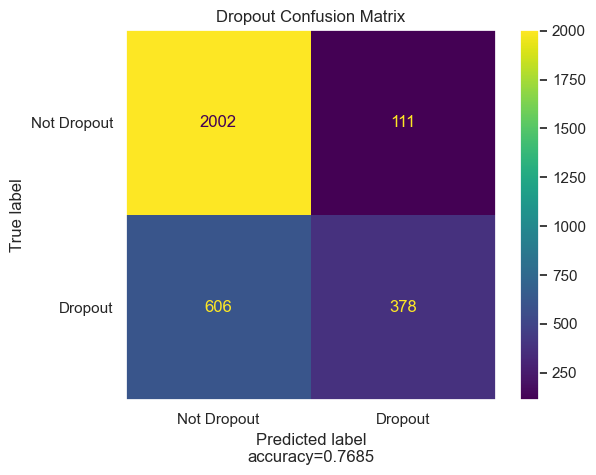

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt # to better format confusion matrix

train_data = np.append(OneHotEncoder().fit_transform(dropout_train_data[['Gender', 'Scholarship holder', 'Debtor', 'Tuition fees up to date']].values).toarray(),
                dropout_train_data['Age at enrollment'].values.reshape(-1,1), axis=1)
test_data = np.append(OneHotEncoder().fit_transform(dropout_test_data[['Gender', 'Scholarship holder', 'Debtor','Tuition fees up to date']].values).toarray(),
                dropout_test_data['Age at enrollment'].values.reshape(-1,1), axis=1)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X=train_data, y=dropout_train_target)

y_pred = logistic_model.predict(test_data)


d_score = logistic_model.score(test_data, dropout_test_target)
print(d_score)

cm = ConfusionMatrixDisplay.from_estimator(logistic_model, test_data, dropout_test_target, display_labels = ['Not Dropout', 'Dropout'])
plt.title('Dropout Confusion Matrix')
plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(d_score))
plt.grid(False)




In [15]:
# create an instance of OneHotEncoder and fit it to the original dataframe
ohe = OneHotEncoder()
ohe.fit(dropout_train_data[['Gender', 'Scholarship holder', 'Debtor', 'Tuition fees up to date']])

# transform the training and test data using the fitted encoder
train_data = ohe.transform(dropout_train_data[['Gender', 'Scholarship holder', 'Debtor', 'Tuition fees up to date']]).toarray()
test_data = ohe.transform(dropout_test_data[['Gender', 'Scholarship holder', 'Debtor', 'Tuition fees up to date']]).toarray()

# append the 'Age at enrollment' column to the train_data and test_data arrays
train_data = np.append(train_data, dropout_train_data['Age at enrollment'].values.reshape(-1,1), axis=1)
test_data = np.append(test_data, dropout_test_data['Age at enrollment'].values.reshape(-1,1), axis=1)

# get the names of the one-hot encoded features
feature_names = ohe.get_feature_names_out(['Gender', 'Scholarship holder', 'Debtor', 'Tuition fees up to date'])

# append the 'Age at enrollment' feature name to the feature_names array
feature_names = np.append(feature_names, 'Age at enrollment')

# check the length of the feature_names array and the length of the coefficients array
print(len(feature_names))
print(len(logistic_model.coef_[0]))

# create a dataframe with the coefficients and their corresponding feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logistic_model.coef_[0]
})

# print(coef_df)

coef_neat = coef_df.copy()
blankIndex=[''] * len(coef_neat)
coef_neat.index=blankIndex
coef_neat

9
9


,Feature,Coefficient
,Gender_Female,-0.233886
,Gender_Male,0.232787
,Scholarship holder_No Scholarship,0.658032
,Scholarship holder_Scholarship,-0.659131
,Debtor_Debtor,0.152930
,Debtor_Not Debtor,-0.154029
,Tuition fees up to date_Not up to date,1.305195
,Tuition fees up to date_Up to date,-1.306295
,Age at enrollment,0.043187


## College and State/Region Demographics EDA

Text(0.5, 1.0, 'Median Age at Enrollment by Student Status')

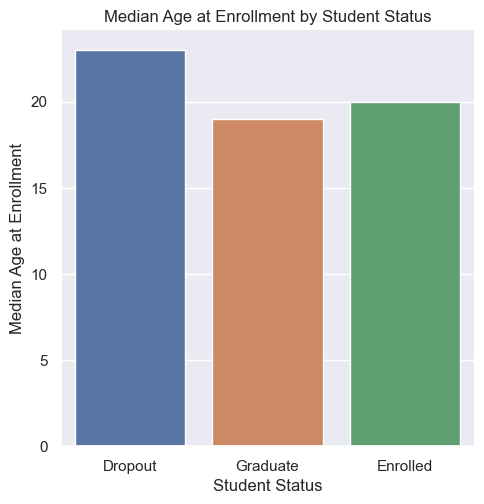

In [16]:
sns.catplot(dropout, x='Target', y='Age at enrollment', kind='bar', estimator='median', errorbar=('ci',False))

plt.xlabel("Student Status")
plt.ylabel("Median Age at Enrollment")
plt.title("Median Age at Enrollment by Student Status")


In [17]:
from scipy import stats
grads = dropout[dropout["Target"] == "Graduate"]
enrolled = dropout[dropout["Target"] == "Enrolled"]
dropouts = dropout[dropout["Target"] == "Dropout"]
# use t-interval as data is large ish
n = grads.shape[0]
ci_grads = stats.t.interval(0.95, loc = grads["Age at enrollment"].median(), 
                           scale = grads["Age at enrollment"].std()/np.sqrt(n), df = n-1)
n = enrolled.shape[0]
ci_enrolled = stats.t.interval(0.95, loc = enrolled["Age at enrollment"].median(), 
                           scale = enrolled["Age at enrollment"].std()/np.sqrt(n), df = n-1)
n = dropouts.shape[0]
ci_dropouts = stats.t.interval(0.95, loc = dropouts["Age at enrollment"].median(), 
                           scale = dropouts["Age at enrollment"].std()/np.sqrt(n), df = n-1)
print("Confidence Interval for Median Starting Age of Graduated Students: ", ci_grads)
print("Confidence Interval for Median Starting Age of Enrolled Students: ", ci_enrolled)
print("Confidence Interval for Median Starting Age of Dropout Students: ", ci_dropouts)

Confidence Interval for Median Starting Age of Graduated Students:  (18.720730603181103, 19.279269396818897)
Confidence Interval for Median Starting Age of Enrolled Students:  (19.560937918814982, 20.439062081185018)
Confidence Interval for Median Starting Age of Dropout Students:  (22.54705919212147, 23.45294080787853)


Text(16.694444444444443, 0.5, 'Mean Graduation Rate')

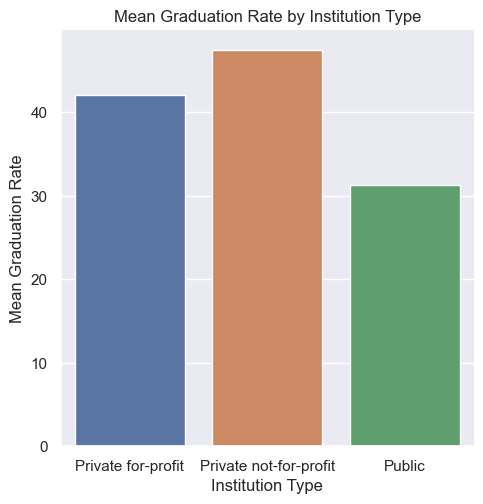

In [18]:
sns.catplot(collegeCompletion, x = 'control', y = 'grad_150_rate', kind='bar', errorbar=('ci', False))
plt.title('Mean Graduation Rate by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Mean Graduation Rate')

In [19]:
public = collegeCompletion[collegeCompletion["control"] == "Public"]["grad_150_rate"].dropna()
private = collegeCompletion[collegeCompletion["control"] != "Private for-profit"]["grad_150_rate"].dropna()
p_val = float(stats.ttest_ind(public, private)[1])
print("Mean Graduation Rate of Public Schools: ", public.mean())
print("Mean Graduation Rate of Private Schools: ", private.mean())
print("P-value: ", p_val)

Mean Graduation Rate of Public Schools:  31.261984422621065
Mean Graduation Rate of Private Schools:  38.24154050618282
P-value:  0.0
